# PyTorch Geometric(GNN)

[前回](https://deepblue-ts.co.jp/python/python%e3%81%aenetworkx%e3%81%a7%e7%b0%a1%e5%8d%98%e3%81%ab%e3%83%8d%e3%83%83%e3%83%88%e3%83%af%e3%83%bc%e3%82%af%e5%88%86%e6%9e%90/)は、networkxを使って、グラフデータを扱う方法を紹介しました。今回は、近年話題のGNN(Graph Neural Network)を扱える[Pytorch Geomeric]((https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html))というライブラリーを紹介したいと思います。具体的には、Google Golaboratoryでのインストール方法と実際にグラフの作成することで正常に動作するか確認するところまでを紹介したいと思います。

## インストール方法

In [5]:
# pytorchのバージョンをチェック
torch.__version__

'1.5.0+cu101'

[公式リファレンス](https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html)より参照

In [6]:
!pip install torch-scatter==latest+cu101 -f https://pytorch-geometric.com/whl/torch-1.5.0.html
!pip install torch-sparse==latest+cu101 -f https://pytorch-geometric.com/whl/torch-1.5.0.html
!pip install torch-cluster==latest+cu101 -f https://pytorch-geometric.com/whl/torch-1.5.0.html
!pip install torch-spline-conv==latest+cu101 -f https://pytorch-geometric.com/whl/torch-1.5.0.html
!pip install torch-geometric

Looking in links: https://pytorch-geometric.com/whl/torch-1.5.0.html
     |████████████████████████████████| 12.3MB 349kB/s 
  Found existing installation: torch-scatter 2.0.4
    Uninstalling torch-scatter-2.0.4:
      Successfully uninstalled torch-scatter-2.0.4
Looking in links: https://pytorch-geometric.com/whl/torch-1.5.0.html
     |████████████████████████████████| 22.0MB 1.4MB/s 
  Found existing installation: torch-sparse 0.6.1
    Uninstalling torch-sparse-0.6.1:
      Successfully uninstalled torch-sparse-0.6.1
Looking in links: https://pytorch-geometric.com/whl/torch-1.5.0.html
     |████████████████████████████████| 18.2MB 1.2MB/s 
  Found existing installation: torch-cluster 1.5.4
    Uninstalling torch-cluster-1.5.4:
      Successfully uninstalled torch-cluster-1.5.4
Looking in links: https://pytorch-geometric.com/whl/torch-1.5.0.html
     |████████████████████████████████| 6.3MB 411kB/s 
  Found existing installation: torch-spline-conv 1.2.0
    Uninstalling torch-spline

In [0]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import torch
from torch_geometric.data import Data

%matplotlib inline

## データの作成

以下のような隣接リストを`graph`に格納しています。隣接リストでは、数字が頂点番号を示していて、`[0, 1]`ならば頂点0から頂点1へ枝があることを意味しています。また、無向グラフを作成したいため、`[1, 0]`という枝も追加しています。  
`x`は、頂点それぞれに付随している特徴ベクトルです。頂点の特徴ベクトルとは例えるならば、twitterのようなSNSで頂点をユーザとしたときに、そのユーザのフォロー数やフォロワー数などの情報をまとめたベクトルです。`x`でいうと、頂点0で表されたユーザは10人をフォローしていて、15人にフォローされているといった具合です。

In [0]:
graph = [[0,1],
         [1,0],
         [2,0],
         [0,2],
         [2,5],
         [5,2],
         [2,4],
         [4,2],
         [0,3],
         [3,0],
         [4,5],
         [5,4]]
x = [[10, 15],[11, 12],[13, 15],[18, 20],[10, 20],[17, 21]]

実際にどのようなグラフになるか前回紹介したnetworkxを使って描画してみた結果が以下です。

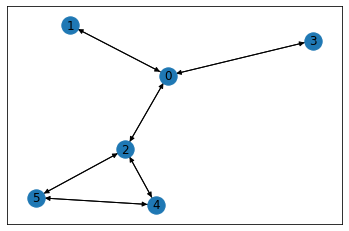

In [18]:
# グラフの描画
G = nx.DiGraph()
G.add_edges_from(graph)
nx.draw_networkx(G)

次に、`graph`のような隣接リストの形式ではGeometricでは受け取れないため、COO形式に隣接リストを変換する必要があります。COO形式とは、枝の出発点を集めたリストと枝の到着点を集めたリストに分ける形式です。

In [19]:
# COO形式に変換
edge_index = np.array(graph).T.tolist()
edge_index

[[0, 1, 2, 0, 2, 5, 2, 4, 0, 3, 4, 5], [1, 0, 0, 2, 5, 2, 4, 2, 3, 0, 5, 4]]

In [0]:
# tensor型に変換
x = torch.tensor(x, dtype=torch.float)
edge_index = torch.tensor(edge_index, dtype=torch.long)

tensor型に変換した`x`と`edge_index`を`from torch_geometric.data import Data`でimportしておいたDataに入力することで、Geometricで扱えるデータ型に変換することができます。

In [21]:
data = Data(x=x, edge_index=edge_index) 
print(data)

Data(edge_index=[2, 12], x=[6, 2])


上記の出力結果が示す数値の意味は以下の通りです。
* edge_index = [始点リストと終点リスト(2), 枝数(12=6*2)]
* x = [頂点数(6), 特徴量次元(2)]

## まとめ

今回は、Pytorch GeometricのGoogle Colaboratory上でのインストール方法と簡単な動作チェックまでを行いました。  
GNNのライブラリーでは、他に[Deep Graph Library](https://www.dgl.ai/)などもありますので、気になる方はチェックしてみてください。  
次回は、実際にモデルを構築してみたいと思いますので、よろしければご覧ください。